In [3]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st


In [9]:
# Load the CSV files into a Pandas DataFrames
State_and_County_df = pd.read_csv("FoodEnvironmentAtlas/StateAndCountyData.csv")
Population_by_County_df = pd.read_csv("FoodEnvironmentAtlas/SupplementalDataCounty.csv")
Variable_List_df = pd.read_csv("FoodEnvironmentAtlas/VariableList.csv")
# Filter Data to the state of Georgia and Display sample data
georgia_county_filter = State_and_County_df['State']== 'GA'
GAcounties = State_and_County_df.loc[georgia_county_filter, ['County', 'Variable_Code', 'Value']]
GA_Population_Data_df = Population_by_County_df.loc[georgia_county_filter, ['County', 'Variable_Code', 'Value']]
GA_Population_Data_df

#Display the Georgia data
print(GAcounties.head())
print(GA_Population_Data_df.head())

# Look for missing values
GA_Population_Data_df.count()
GAcounties.count()


# Drop null rows
GAcounties= GAcounties.dropna(how='any')
GAcounties.count()


        County          Variable_Code        Value
15864  Appling          LACCESS_POP10  3655.485669
15865  Appling          LACCESS_POP15  3671.279857
15866  Appling  PCH_LACCESS_POP_10_15     0.432068
15867  Appling      PCT_LACCESS_POP10    20.045436
15868  Appling      PCT_LACCESS_POP15    20.132046
                  County             Variable_Code  Value
15864  White Pine County  Population_Estimate_2016   9721
15865  White Pine County  Population_Estimate_2017   9599
15866  White Pine County  Population_Estimate_2018   9475
15867        Carson City    2010_Census_Population  55274
15868        Carson City  Population_Estimate_2011  54679


array(['LACCESS_POP10', 'LACCESS_POP15', 'PCH_LACCESS_POP_10_15',
       'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15', 'LACCESS_LOWI10',
       'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15', 'PCT_LACCESS_LOWI10',
       'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10', 'LACCESS_HHNV15',
       'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV10',
       'PCT_LACCESS_HHNV15', 'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15',
       'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15',
       'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS10',
       'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15',
       'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15',
       'LACCESS_WHITE15', 'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15',
       'PCT_LACCESS_BLACK15', 'LACCESS_HISP15', 'PCT_LACCESS_HISP15',
       'LACCESS_NHASIAN15', 'PCT_LACCESS_NHASIAN15', 'LACCESS_NHNA15',
       'PCT_LACCESS_NHNA15', 'LACCESS_NHPI15', 'PCT_LACCESS_NHPI15',
       'LACCESS_MULTIR15', 'PCT_LACCESS_MULTIR15', 'GROC11', 'GROC16',


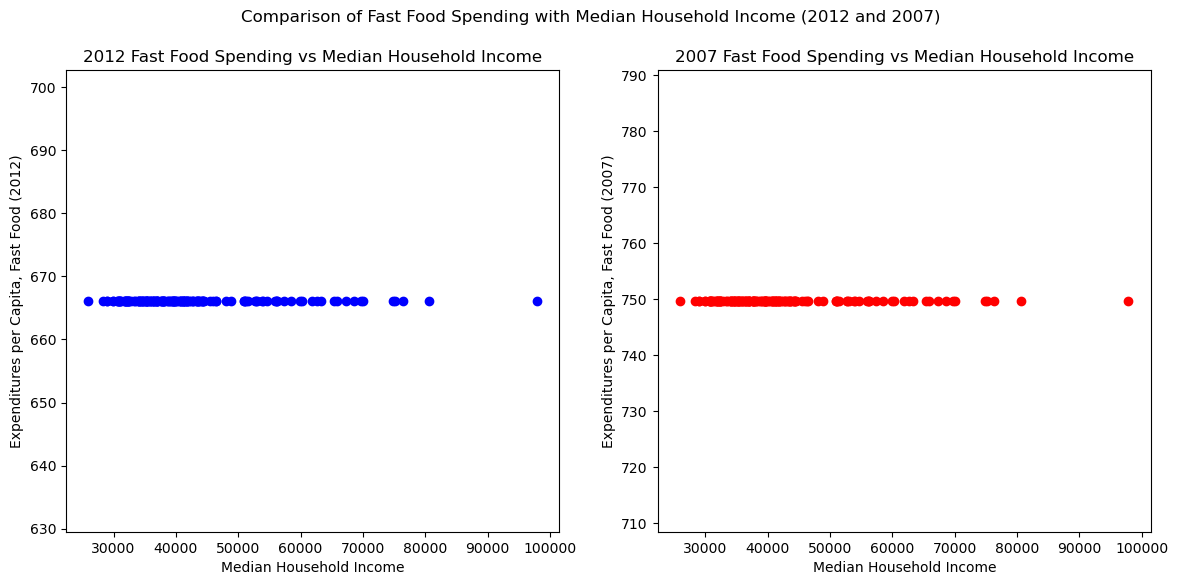

In [54]:
#My question: Does the amount of household Income(Median household income, 2015) correlate with Amount of Fast food consumption?
## Filter for Median Household Income (2015) variable
Median_Household_income = GAcounties[(GAcounties["Variable_Code"] == "MEDHHINC15")]
# Group by County to get the median income for each county
MHI_by_County = Median_Household_income.groupby('County')['Value'].mean()
MHI_by_County
# Now, let's create a DataFrame for Fast Food Consumption
fast_food_spending12_df = GAcounties[GAcounties['Variable_Code'] == 'PC_FFRSALES12']
fast_food_spending07_df = GAcounties[GAcounties['Variable_Code'] == 'PC_FFRSALES07']


# Group by County to get the total fast food consumption for each county
fast_food__spending_by_County12 = fast_food_spending12_df.groupby('County')['Value'].sum()
fast_food__spending_by_County07 = fast_food_spending07_df.groupby('County')['Value'].sum()


# Create a new DataFrame combining median income and fast food consumption
MHI_vs_fast_food_spending_df = pd.DataFrame({
    'Median_Household_Income': MHI_by_County,
    'Expenditures per capita, fast food, 2012': fast_food__spending_by_County12,
    'Expenditures per capita, fast food, 2007': fast_food__spending_by_County07
})

# Plotting the chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for 2012
ax1.scatter(MHI_vs_fast_food_spending_df['Median_Household_Income'], 
            MHI_vs_fast_food_spending_df['Expenditures per capita, fast food, 2012'],
            label='2012', color='blue')

ax1.set_xlabel('Median Household Income')
ax1.set_ylabel('Expenditures per Capita, Fast Food (2012)')
ax1.set_title('2012 Fast Food Spending vs Median Household Income')

# Scatter plot for 2007
ax2.scatter(MHI_vs_fast_food_spending_df['Median_Household_Income'], 
            MHI_vs_fast_food_spending_df['Expenditures per capita, fast food, 2007'],
            label='2007', color='red')

ax2.set_xlabel('Median Household Income')
ax2.set_ylabel('Expenditures per Capita, Fast Food (2007)')
ax2.set_title('2007 Fast Food Spending vs Median Household Income')

# Common title for the entire figure
fig.suptitle('Comparison of Fast Food Spending with Median Household Income (2012 and 2007)')

# Display the plot
plt.show()







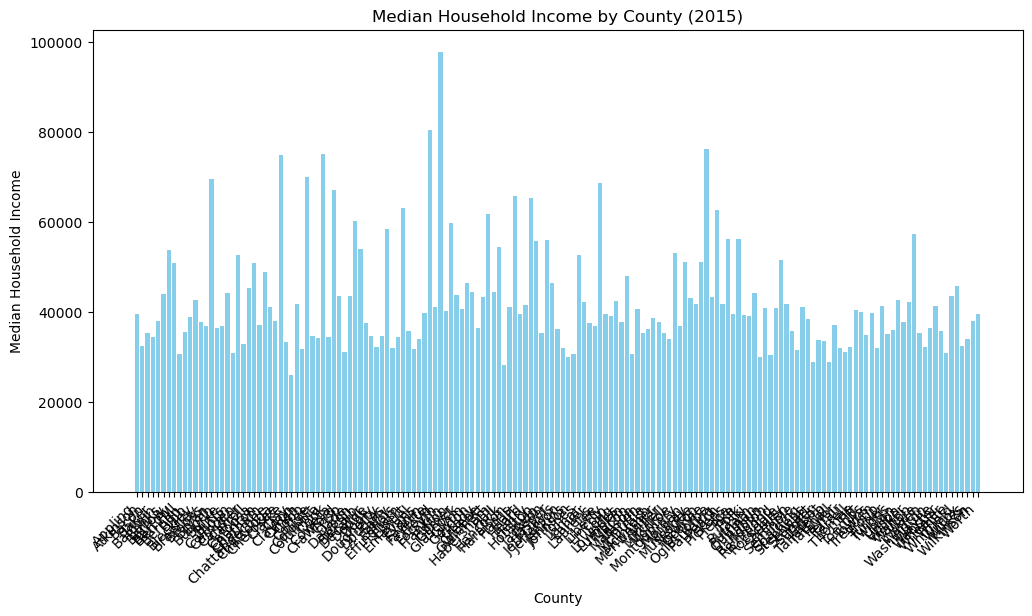

In [16]:

#Visualizing Median Household Income by County (for Georgia demographics?)
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(MHI_by_County.index, MHI_by_County, color='skyblue')

# Adding labels and title
plt.title('Median Household Income by County (2015)')
plt.xlabel('County')
plt.ylabel('Median Household Income')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot

plt.show()


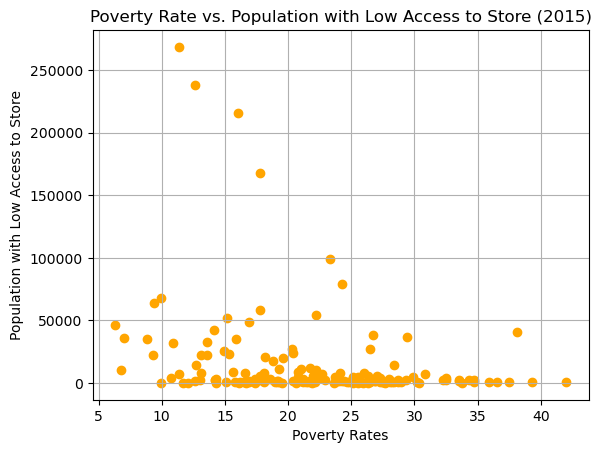

In [20]:
#Relationship in Question: Poverty Rate vs. Population with Low Access to Store (2015)
Poverty_Rate_15 = GAcounties[(GAcounties["Variable_Code"] == "POVRATE15")]
#Population, low access to store, 2015
Lack_of_access15 = GAcounties[(GAcounties["Variable_Code"] == "LACCESS_POP15")]
#SNAP households, low access to store
SNAP_households = GAcounties[(GAcounties["Variable_Code"] == "LACCESS_SNAP15")]


# Group by County to get the average poverty rate for each county
Poverty_Rate_by_County = Poverty_Rate_15.groupby('County')['Value'].mean()

# Group by County to get the total population with low access to stores for each county
Lack_of_access_by_County = Lack_of_access15.groupby('County')['Value'].sum()
# Group by County to get the total SNAP households with low access to stores for each county
SNAP_households_by_County = SNAP_households.groupby('County')['Value'].sum()

# Create a new DataFrame combining poverty rate, lack of access, and SNAP households
Poverty_vs_Access_df = pd.DataFrame({
    'Poverty_Rate': Poverty_Rate_by_County,
    'Population_with_Low_Access': Lack_of_access_by_County,
    'SNAP_Households_with_Low_Access': SNAP_households_by_County
})

# Scatter plot for Poverty Rate vs. Population with Low access
plt.scatter(Poverty_vs_Access_df['Poverty_Rate'], Poverty_vs_Access_df['Population_with_Low_Access'], label='Population Low Access to Store', color='orange')
# Adding labels and title
plt.xlabel('Poverty Rates')
plt.ylabel('Population with Low Access to Store')
plt.title('Poverty Rate vs. Population with Low Access to Store (2015)')
plt.grid(True)

# Display the plot
plt.show()



In [74]:
#My Question: Compare Fast Food vs Restaurant Expenditures in the Counties of Georgia with the highest and lowest Poverty Rates
#Variable Definitions
#Expenditures per capita, fast food, 2007
fast_food__spending07 = GAcounties[(GAcounties["Variable_Code"] == "PC_FFRSALES07")]
#Expenditures per capita, fast food, 2012
fast_food__spending12 = GAcounties[(GAcounties["Variable_Code"] == "PC_FFRSALES12")]
#Expenditures per capita, restaurants, 2007
restaurant_spending07 = GAcounties[(GAcounties["Variable_Code"] == "PC_FSRSALES07")]
#"Expenditures per capita, restaurants, 2012
restaurant_spending12 = GAcounties[(GAcounties["Variable_Code"] == "PC_FSRSALES12")]

#Group by County to get trends by county
fast_food__spending_by_County12 = fast_food_spending12_df.groupby('County')['Value'].mean()
fast_food__spending_by_County07 = fast_food_spending07_df.groupby('County')['Value'].mean()
restaurant_spending_by_County07 = restaurant_spending07.groupby('County')['Value'].mean()
restaurant_spending_by_County12 = restaurant_spending12.groupby('County')['Value'].mean()
Poverty_Rate_by_County = Poverty_Rate_15.groupby('County')['Value'].mean()

expenditures_vs_poverty_df = pd.DataFrame({
    'Expenditures per capita, fast food, 2007': fast_food__spending_by_County07,
    'Expenditures per capita, fast food, 2012': fast_food__spending_by_County12,
    'Expenditures per capita, restaurants, 2007': restaurant_spending_by_County07,
    'Expenditures per capita, restaurants, 2012': restaurant_spending_by_County12,
    'Poverty_Rate': Poverty_Rate_by_County
})
Highest_PRate_Counties= ['Dooly','Clay','Telfair','Hancock','Jenkins',]
Lowest_PRate_Counties =['Forsyth', 'Oconee', 'Fayette', 'Paulding', 'Columbia']
highest_p_rate_data = expenditures_vs_poverty_df.loc[Highest_PRate_Counties]
lowest_p_rate_data = expenditures_vs_poverty_df.loc[Lowest_PRate_Counties]
lowest_p_rate_data

### No correlation - alldata values are the same in each category
sorted_counties = Poverty_Rate_by_County.sort_values()
Lowest_Poverty_Rate_Counties = sorted_counties.head(5)
Highest_Poverty_Rate_Counties = sorted_counties.tail(5)

Lowest_Poverty_Rate_Counties

County
Forsyth     6.3
Oconee      6.8
Fayette     7.0
Paulding    8.8
Columbia    9.3
Name: Value, dtype: float64

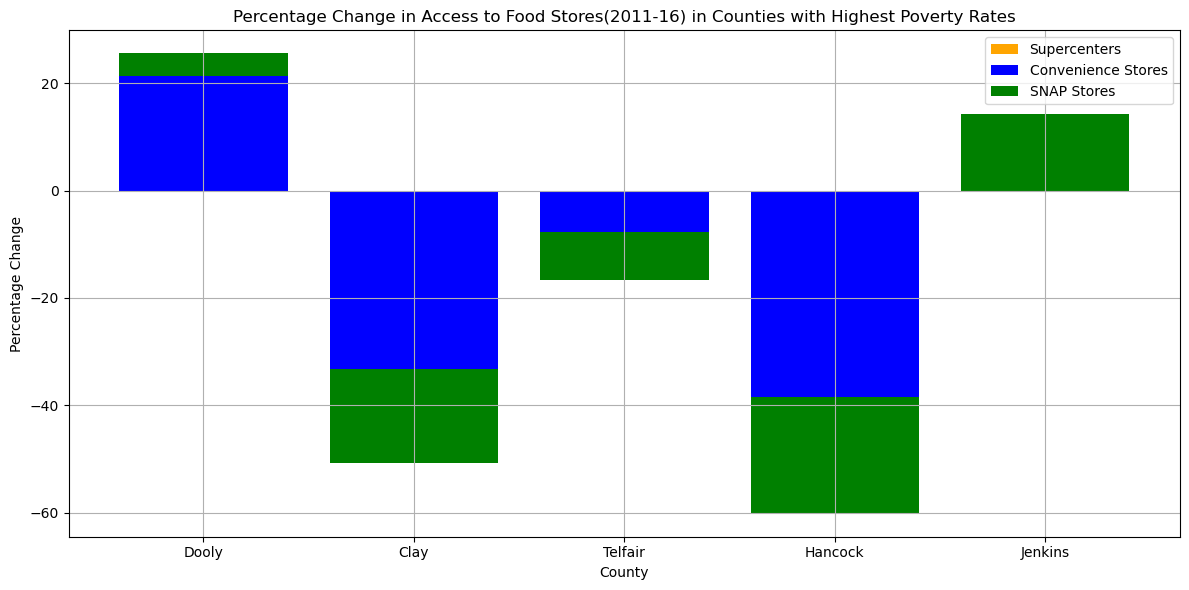

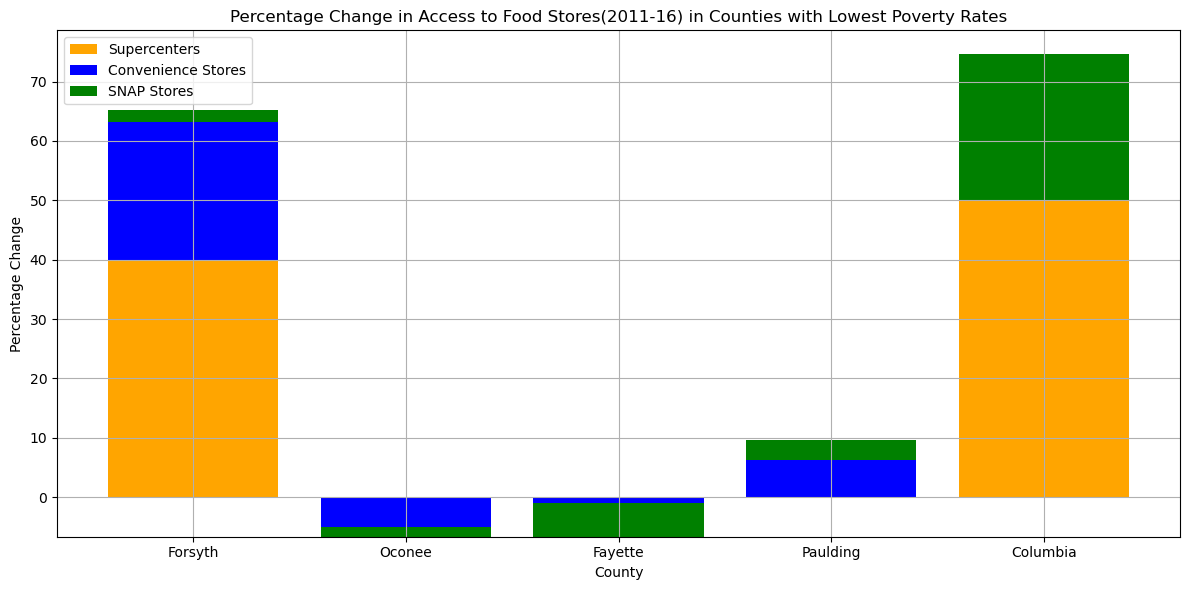

In [76]:
#My Question: Show Percentage Change in Access to Food Stores in Counties with Lowest Poverty Rates versus Counties with the highest Poverty Rates
#Supercenters & club stores (% change), 2011-16
PCT_Change_Supercenters = GAcounties[(GAcounties["Variable_Code"] =="PCH_SUPERC_11_16")]
PCT_Change_ConvenienceStores = GAcounties[(GAcounties["Variable_Code"] =="PCH_CONVS_11_16")]
PCT_Change_SNAPstores = GAcounties[(GAcounties["Variable_Code"] =="PCH_SNAPS_12_17")]

PCT_Change_Supercenters_by_County = PCT_Change_Supercenters.groupby('County')['Value'].mean()
PCT_Change_ConvenienceStores_by_County = PCT_Change_ConvenienceStores.groupby('County')['Value'].mean()
PCT_Change_SNAPstores_by_County = PCT_Change_SNAPstores.groupby('County')['Value'].mean()

Change_in_Access_to_Food_df = pd.DataFrame({
    'Supercenters(%change)': PCT_Change_Supercenters_by_County,
    'ConvenienceStores (%change)': PCT_Change_ConvenienceStores_by_County,
    'SNAP Stores (%change)': PCT_Change_SNAPstores_by_County,
})
Change_in_Access_to_Food_df

highest_p_rate_vs_Access = Change_in_Access_to_Food_df.loc[Highest_PRate_Counties]
lowest_p_rate_vs_Access = Change_in_Access_to_Food_df.loc[Lowest_PRate_Counties]
lowest_p_rate_vs_Access

# Set up figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars for each column for counties with the highest poverty rates
ax.bar(highest_p_rate_vs_Access.index, highest_p_rate_vs_Access['Supercenters(%change)'], label='Supercenters', color='orange')
ax.bar(highest_p_rate_vs_Access.index, highest_p_rate_vs_Access['ConvenienceStores (%change)'], label='Convenience Stores', color='blue', bottom=highest_p_rate_vs_Access['Supercenters(%change)'])
ax.bar(highest_p_rate_vs_Access.index, highest_p_rate_vs_Access['SNAP Stores (%change)'], label='SNAP Stores', color='green', bottom=highest_p_rate_vs_Access['Supercenters(%change)'] + highest_p_rate_vs_Access['ConvenienceStores (%change)'])

# Adding labels and title
ax.set_xlabel('County')
ax.set_ylabel('Percentage Change')
ax.set_title('Percentage Change in Access to Food Stores(2011-16) in Counties with Highest Poverty Rates')
ax.legend()
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Set up figure and axis for counties with the lowest poverty rates
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars for each column for counties with the lowest poverty rates
ax.bar(lowest_p_rate_vs_Access.index, lowest_p_rate_vs_Access['Supercenters(%change)'], label='Supercenters', color='orange')
ax.bar(lowest_p_rate_vs_Access.index, lowest_p_rate_vs_Access['ConvenienceStores (%change)'], label='Convenience Stores', color='blue', bottom=lowest_p_rate_vs_Access['Supercenters(%change)'])
ax.bar(lowest_p_rate_vs_Access.index, lowest_p_rate_vs_Access['SNAP Stores (%change)'], label='SNAP Stores', color='green', bottom=lowest_p_rate_vs_Access['Supercenters(%change)'] + lowest_p_rate_vs_Access['ConvenienceStores (%change)'])

# Adding labels and title
ax.set_xlabel('County')
ax.set_ylabel('Percentage Change')
ax.set_title('Percentage Change in Access to Food Stores(2011-16) in Counties with Lowest Poverty Rates')
ax.legend()
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Demographics of Population with Low Access to Stores')

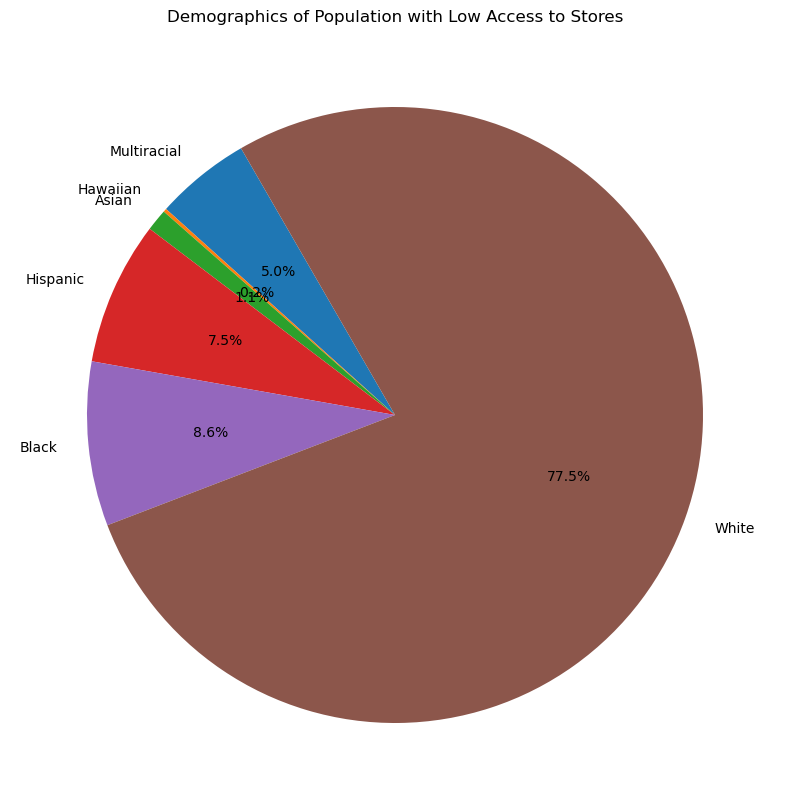

In [87]:

#Relationship in Question: Race vs. Access to Stores
#"Multiracial, low access to store (%), 2015"
MultiracialPCT_Access= GAcounties[(GAcounties["Variable_Code"] =="PCT_LACCESS_MULTIR15")]
#"American Indian or Alaska Native, low access to store (%), 2015",Access and Proximity to Grocery Store,ACCESS,Demographics,PCT_LACCESS_NHNA15
HawaiianPCT_Access= GAcounties[(GAcounties["Variable_Code"] =="PCT_LACCESS_NHNA15")]
#"Asian, low access to store (%), 2015"
AsianPCT_Access=GAcounties[(GAcounties["Variable_Code"] =="PCT_LACCESS_NHASIAN15")]
#"Hispanic ethnicity, low access to store (%), 2015"
HispanicPCT_Access=GAcounties[(GAcounties["Variable_Code"] =="PCT_LACCESS_HISP15")]
#"Black, low access to store (%), 2015"
BlackPCT_Access=GAcounties[(GAcounties["Variable_Code"] =="PCT_LACCESS_BLACK15")]
#"White, low access to store (%), 2015"
WhitePCT_Access=GAcounties[(GAcounties["Variable_Code"] =="PCT_LACCESS_WHITE15")]

MultiracialPCT_Access_by_County =MultiracialPCT_Access.groupby('County')['Value'].mean()
HawaiianPCT_Access_by_County =HawaiianPCT_Access.groupby('County')['Value'].mean()
AsianPCT_Access_by_County =AsianPCT_Access.groupby('County')['Value'].mean()
HispanicPCT_Access_by_County =HispanicPCT_Access.groupby('County')['Value'].mean()
BlackPCT_Access_by_County =BlackPCT_Access.groupby('County')['Value'].mean()
WhitePCT_Access_by_County =WhitePCT_Access.groupby('County')['Value'].mean()

Ethnicity_Access_df = pd.DataFrame({
    'Multiracial': MultiracialPCT_Access_by_County,
    'Hawaiian': HawaiianPCT_Access_by_County,
    'Asian': AsianPCT_Access_by_County,
    'Hispanic': HispanicPCT_Access_by_County,
    'Black': BlackPCT_Access_by_County,
    'White': WhitePCT_Access_by_County
})

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(Ethnicity_Access_df.iloc[0], labels=Ethnicity_Access_df.columns, autopct='%1.1f%%', startangle=120)
ax.set_title('Demographics of Population with Low Access to Stores')


